In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Model Options = Support Vector Regressor, Random Forest Regressor, Gradient Boosting Regressor (SVR first)

# Load and clean the data
df = pd.read_excel('data/Shale Raw Data.xlsx', sheet_name='Raw Data', skiprows=1)
df = df.rename(columns={
    'Month': 'Month/Year',
    'Rig count': 'Rig Count',
    'Production per rig': 'Production per Rig (Oil)',
    'Legacy production change': 'Legacy Production Change (Oil)',
    'Total production': 'Total Production (Oil)',
    'Production per rig.1': 'Production per Rig (Gas)',
    'Legacy production change.1': 'Legacy Production Change (Gas)',
    'Total production.1': 'Total Production (Gas)',
    'region': 'Region'
})
df['Month'] = df['Month/Year'].dt.month
df['Year'] = df['Month/Year'].dt.year
df = df.dropna()

# Split into separate DataFrames for Oil and Gas
df_oil = df[['Month', 'Year', 'Region', 'Rig Count', 'Production per Rig (Oil)', 'Legacy Production Change (Oil)', 'Total Production (Oil)']].copy()
df_gas = df[['Month', 'Year', 'Region', 'Rig Count', 'Production per Rig (Gas)', 'Legacy Production Change (Gas)', 'Total Production (Gas)']].copy()

### Encoding the Date as a Numerical Feature
The total production over time is linear or exponential, so converting the Month/Year into a time delta (months from the January 2007 baseline) is valid.

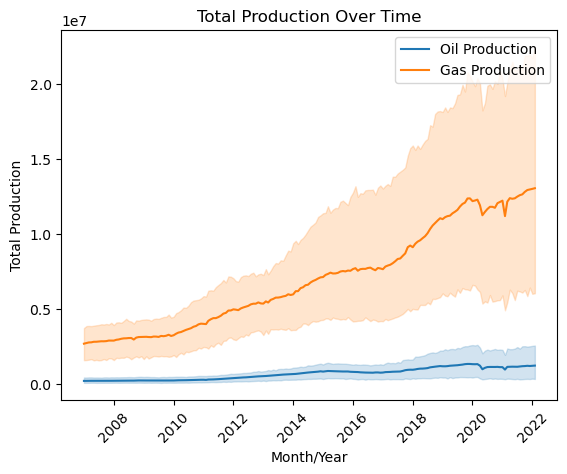

|    | Region   |   Rig Count |   Production per Rig (Oil) |   Legacy Production Change (Oil) |   Total Production (Oil) |   Months since Baseline (Jan 2007) |
|---:|:---------|------------:|---------------------------:|---------------------------------:|-------------------------:|-----------------------------------:|
|  0 | Anadarko |         176 |                    20.5864 |                         -526.4   |                   126398 |                                  0 |
|  1 | Anadarko |         180 |                    21.4424 |                         -878.115 |                   134177 |                                  1 |
|  2 | Anadarko |         166 |                    22.2041 |                        -1190.88  |                   137516 |                                  2 |
|  3 | Anadarko |         157 |                    23.0386 |                        -1532.55  |                   141463 |                                  3 |
|  4 | Anadarko |         170 |         

In [45]:
# Investigate relationship between Month/Year and Total Production
sns.lineplot(data=df, x='Month/Year', y='Total Production (Oil)', label='Oil Production')
sns.lineplot(data=df, x='Month/Year', y='Total Production (Gas)', label='Gas Production')
plt.title('Total Production Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Total Production')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Convert Month/Year to a numerical feature for modeling
df_oil['Months since Baseline (Jan 2007)'] = (df_oil['Year'] - 2007) * 12 + df_oil['Month'] - 1
df_gas['Months since Baseline (Jan 2007)'] = (df_gas['Year'] - 2007) * 12 + df_gas['Month'] - 1

df_oil = df_oil.drop(columns=['Year', 'Month'])
df_gas = df_gas.drop(columns=['Year', 'Month'])

print(df_oil.head().to_markdown())
print(df_gas.head().to_markdown())